<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Authentication" data-toc-modified-id="Authentication-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Authentication</a></span></li><li><span><a href="#EDA-using-general-endpoints" data-toc-modified-id="EDA-using-general-endpoints-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA using general endpoints</a></span></li><li><span><a href="#Top-10-Crypocurrencies-(By-Price)" data-toc-modified-id="Top-10-Crypocurrencies-(By-Price)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Top 10 Crypocurrencies (By Price)</a></span></li><li><span><a href="#Get-Market-Depth" data-toc-modified-id="Get-Market-Depth-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get Market Depth</a></span></li><li><span><a href="#Get-Historical-Data" data-toc-modified-id="Get-Historical-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Get Historical Data</a></span></li><li><span><a href="#Visualization-using-mplfinance" data-toc-modified-id="Visualization-using-mplfinance-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Visualization using mplfinance</a></span></li></ul></div>

# Setup

- Setup your Binance account and click on 'API Management' in your profile. Create a new API for EDA and capture the api key and secret.
- Edit restrictions to only your own IP Address for security purposes 

In [2]:
apikey = '{your-ap-key}'
secret = '{your-secret}'

In [3]:
!pip install python-binance pandas mplfinance

  Using cached python_binance-1.0.12-py2.py3-none-any.whl (58 kB)
  Using cached mplfinance-0.12.7a17-py3-none-any.whl (62 kB)
  Using cached aiohttp-3.7.4.post0-cp38-cp38-win_amd64.whl (635 kB)
  Using cached dateparser-1.0.0-py2.py3-none-any.whl (279 kB)
  Using cached websockets-9.1-cp38-cp38-win_amd64.whl (90 kB)
  Using cached async_timeout-3.0.1-py3-none-any.whl (8.2 kB)
  Using cached yarl-1.6.3-cp38-cp38-win_amd64.whl (125 kB)
  Using cached multidict-5.1.0-cp38-cp38-win_amd64.whl (48 kB)
  Using cached tzlocal-2.1-py2.py3-none-any.whl (16 kB)


In [49]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import mplfinance as mplf
import matplotlib.pyplot as plt

# Authentication

In [7]:
client = Client(apikey, secret)

# EDA using general endpoints

In [43]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.06539000'},
 {'symbol': 'LTCBTC', 'price': '0.00444400'},
 {'symbol': 'BNBBTC', 'price': '0.00946800'},
 {'symbol': 'NEOBTC', 'price': '0.00127800'},
 {'symbol': 'QTUMETH', 'price': '0.00370000'},
 {'symbol': 'EOSETH', 'price': '0.00204200'},
 {'symbol': 'SNTETH', 'price': '0.00003015'},
 {'symbol': 'BNTETH', 'price': '0.00158100'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00020250'},
 {'symbol': 'BNBETH', 'price': '0.14478000'},
 {'symbol': 'BTCUSDT', 'price': '35514.29000000'},
 {'symbol': 'ETHUSDT', 'price': '2322.36000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001933'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [44]:
#Getting the price for ETHBTC
tickers['symbol' == 'ETHBTC']['price']

'0.06539000'

In [65]:
#use get_symbol_info endpoint for detailed info
eth_info = client.get_symbol_info('ETHBTC')
eth_info

{'symbol': 'ETHBTC',
 'status': 'TRADING',
 'baseAsset': 'ETH',
 'baseAssetPrecision': 8,
 'quoteAsset': 'BTC',
 'quotePrecision': 8,
 'quoteAssetPrecision': 8,
 'baseCommissionPrecision': 8,
 'quoteCommissionPrecision': 8,
 'orderTypes': ['LIMIT',
  'LIMIT_MAKER',
  'MARKET',
  'STOP_LOSS_LIMIT',
  'TAKE_PROFIT_LIMIT'],
 'icebergAllowed': True,
 'ocoAllowed': True,
 'quoteOrderQtyMarketAllowed': True,
 'isSpotTradingAllowed': True,
 'isMarginTradingAllowed': True,
 'filters': [{'filterType': 'PRICE_FILTER',
   'minPrice': '0.00000100',
   'maxPrice': '922327.00000000',
   'tickSize': '0.00000100'},
  {'filterType': 'PERCENT_PRICE',
   'multiplierUp': '5',
   'multiplierDown': '0.2',
   'avgPriceMins': 5},
  {'filterType': 'LOT_SIZE',
   'minQty': '0.00100000',
   'maxQty': '100000.00000000',
   'stepSize': '0.00100000'},
  {'filterType': 'MIN_NOTIONAL',
   'minNotional': '0.00010000',
   'applyToMarket': True,
   'avgPriceMins': 5},
  {'filterType': 'ICEBERG_PARTS', 'limit': 10},
  {'

In [ ]:
#status of eth_info 
eth_info['status'] 

In [101]:
#Converting to df for basic EDA
ticker_df = pd.DataFrame(tickers)
ticker_df.head()

,symbol,price
0,ETHBTC,0.06539000
1,LTCBTC,0.00444400
2,BNBBTC,0.00946800
3,NEOBTC,0.00127800
4,QTUMETH,0.00370000


In [103]:
ticker_df.tail()

,symbol,price
1496,MATICTRY,10.61400000
1497,ETCGBP,38.90000000
1498,SOLGBP,25.70000000
1499,BAKEBTC,0.00008850
1500,COTIBUSD,0.18760000


In [104]:
#Setting index to 'symbol' will make querying and EDA much easier
ticker_df.set_index('symbol', inplace = True)

In [105]:
ticker_df.loc['ETHBIDR']['price']

'33409396.00'

# Top 10 Crypocurrencies (By Price)

In [106]:
ticker_df['price'] = ticker_df['price'].astype(float)
top10_crypto = ticker_df.sort_values(by = ['price'], ascending = False).head(10)
top10_crypto.head(10)

,price
symbol,
BTCBIDR,510775756.0
BTCIDRT,510207570.0
BTCBKRW,42029197.0
ETHBIDR,33409396.0
BTCNGN,32480498.0
BNBBIDR,4844708.0
BNBIDRT,4839530.0
BTCGYEN,4300000.0
BTCRUB,2586245.0


In the above example, since the 'price' data is a string representation of float, I converted to float to sort and play around. You can also convert the string --> float --> int if you want. Either will work! 
However, directly converting string --> int will throw a value error in this case. 

In [108]:
top10_noIndex = top10_crypto.reset_index()
top10_noIndex.head()

,symbol,price
0,BTCBIDR,510775756.0
1,BTCIDRT,510207570.0
2,BTCBKRW,42029197.0
3,ETHBIDR,33409396.0
4,BTCNGN,32480498.0


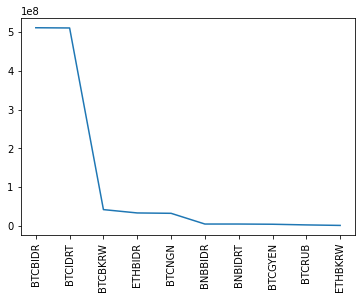

In [110]:
#Plot a bar chart of the top 10 cryptocurrencies
plt.plot(top10_noIndex['symbol'], top10_noIndex['price']) 
plt.xticks(rotation = 90)
plt.show()

1. I had to reset the index of top10_crypto since I could not find a better way to plot a bar chart using the index 'symbol' 
You can also explore plotting the chart using the index ('use_index' parameter) to plot your graph - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html 

2. In the above graph, '1e8' (e = exponential) is a scientific notation used since the numbers on y-axis are large. Calculation of actual numbers from this: (Number on y-axis) * 1e8 
For example - 5 * 1e8 = 5 * 1e8 = 5e8 = 5 * 10^8 = 500,000,000 
To remove scientific notation - https://stackoverflow.com/questions/28371674/prevent-scientific-notation-in-matplotlib-pyplot



# Get Market Depth 

In [92]:
depth = client.get_order_book(symbol='ETHBIDR')
depth

{'lastUpdateId': 30459821,
 'bids': [['33300000.00', '0.31537000'],
  ['33299277.00', '0.00600000'],
  ['33279380.00', '0.09360000'],
  ['33279379.00', '0.00080000'],
  ['33278251.00', '0.72310000'],
  ['33237366.00', '0.76520000'],
  ['33197493.00', '0.79891000'],
  ['33155065.00', '0.70028000'],
  ['33108436.00', '0.06527000'],
  ['33108435.00', '0.09704000'],
  ['33108434.00', '0.83841000'],
  ['33100000.00', '0.01510000'],
  ['33073858.00', '0.11027000'],
  ['33068873.00', '0.06540000'],
  ['33068872.00', '0.06533000'],
  ['33049224.00', '0.35600000'],
  ['33035789.00', '0.03790000'],
  ['33035788.00', '0.06541000'],
  ['33035787.00', '6.87316000'],
  ['33019680.00', '0.00302000'],
  ['33000000.00', '0.14418000'],
  ['32987688.00', '0.00066000'],
  ['32974756.00', '4.98686000'],
  ['32970545.00', '0.48528000'],
  ['32934901.00', '1.71000000'],
  ['32915580.00', '5.57558000'],
  ['32900000.00', '0.02278000'],
  ['32854570.00', '0.02610000'],
  ['32838848.00', '4.89756000'],
  ['3283

In [171]:
#Market Depth by bids
depth_df_bids = pd.DataFrame(depth['bids'])
depth_df_bids.columns = ['Price','Volume']
depth_df_bids['Price'] = depth_df_bids['Price'].astype(float)
depth_df_bids.head()

,Price,Volume
0,33300000.0,0.31537000
1,33299277.0,0.00600000
2,33279380.0,0.09360000
3,33279379.0,0.00080000
4,33278251.0,0.72310000


In [172]:
#Market Depth by asks
depth_df_asks = pd.DataFrame(depth['asks'])
depth_df_asks.columns = ['Price','Volume']
depth_df_asks['Price'] = depth_df_asks['Price'].astype(float)
depth_df_asks.head()

,Price,Volume
0,33328811.0,1.13832000
1,33370889.0,1.06577000
2,33398597.0,0.87885000
3,33421111.0,0.00169000
4,33421112.0,0.00001000


# Get Historical Data

In [114]:
historical_data = client.get_historical_klines("ETHBTC", Client.KLINE_INTERVAL_1DAY, "1 May, 2011")
historical_data

[[1499990400000,
  '0.08000000',
  '0.09103300',
  '0.08000000',
  '0.09099300',
  '1942.05700000',
  1500076799999,
  '170.23852396',
  1994,
  '1076.40500000',
  '94.82527222',
  '22262.26697743'],
 [1500076800000,
  '0.09099300',
  '0.09369900',
  '0.08712700',
  '0.08763500',
  '4013.06600000',
  1500163199999,
  '363.03178785',
  4623,
  '2250.31800000',
  '203.54149755',
  '22275.36801826'],
 [1500163200000,
  '0.08750800',
  '0.08763500',
  '0.07559100',
  '0.08224100',
  '8904.15800000',
  1500249599999,
  '722.21248196',
  8137,
  '5557.57500000',
  '450.34388688',
  '22295.47295841'],
 [1500249600000,
  '0.08236800',
  '0.08839400',
  '0.08169900',
  '0.08753700',
  '6650.93300000',
  1500335999999,
  '568.24653804',
  7639,
  '3859.48500000',
  '329.66875309',
  '22165.74281157'],
 [1500336000000,
  '0.08783100',
  '0.10906800',
  '0.08477700',
  '0.10773200',
  '7245.74100000',
  1500422399999,
  '674.49785037',
  8121,
  '4202.05500000',
  '393.11140275',
  '22505.62469176

In [116]:
#The data returned above is in OHLCV format. Every item in the list contians the following - 
                    

                    #1499040000000,      # Open time
                    #"0.01634790",       # Open
                    #"0.80000000",       # High
                    #"0.01575800",       # Low
                    #"0.01577100",       # Close
                    #"148976.11427815",  # Volume
                    #1499644799999,      # Close time
                    #"2434.19055334",    # Quote asset volume
                    #308,                # Number of trades
                    #"1756.87402397",    # Taker buy base asset volume
                    #"28.46694368",      # Taker buy quote asset volume
                    #"17928899.62484339" # Can be ignored]

To read more about the OHLCV format - 
https://python-binance.readthedocs.io/en/latest/_modules/binance/client.html#Client.get_historical_klines
https://www.kaiko.com/collections/ohlcv

In [173]:
#Converting to df and defining columns
historical_df = pd.DataFrame(historical_data)
historical_df.columns = ['Open Time','Open','High','Low','Close','Volume','Close Time','Quote Asset Vol','#Trades','Taker buy asset vol','Taker buy quote vol','Ignore']

In [121]:
historical_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Vol,#Trades,Taker buy asset vol,Taker buy quote vol,Ignore
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,22262.26697743
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,22275.36801826
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,22295.47295841
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,22165.74281157
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,22505.62469176


In [174]:
#Data types of all columns
historical_df.dtypes

Open Time               int64
Open                   object
High                   object
Low                    object
Close                  object
Volume                 object
Close Time              int64
Quote Asset Vol        object
#Trades                 int64
Taker buy asset vol    object
Taker buy quote vol    object
Ignore                 object
dtype: object

Need to convert - 
1. 'Open Time' and 'Close Time' to datetime format for sorting 
2. Other object dtypes (strings) to numerical values to plot on the graph

In [175]:
historical_df['Open Time'] = pd.to_datetime(historical_df['Open Time']/1000, unit = 's')
historical_df['Close Time'] = pd.to_datetime(historical_df['Close Time']/1000, unit = 's')

In [176]:
numerical_data = ['Open','High','Low','Close','Volume','Quote Asset Vol','Taker buy asset vol','Taker buy quote vol','Ignore']
historical_df[numerical_data] = historical_df[numerical_data].apply(pd.to_numeric, axis = 1)

In [177]:
historical_df.dtypes

Open Time              datetime64[ns]
Open                          float64
High                          float64
Low                           float64
Close                         float64
Volume                        float64
Close Time             datetime64[ns]
Quote Asset Vol               float64
#Trades                         int64
Taker buy asset vol           float64
Taker buy quote vol           float64
Ignore                        float64
dtype: object

# Visualization using mplfinance

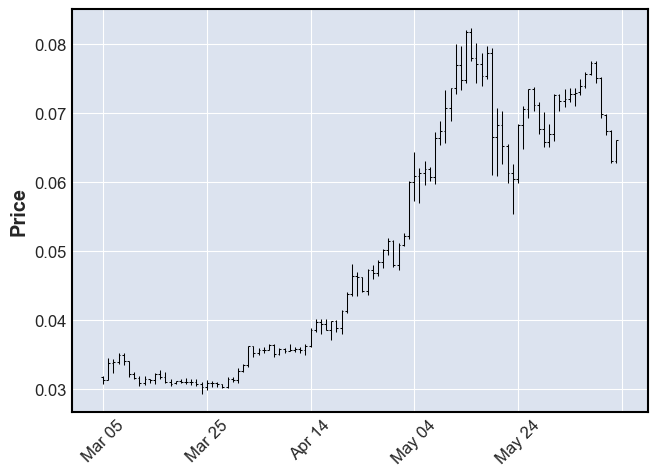

In [144]:
mplf.plot(historical_df.set_index('Close Time').tail(100))

In the above graph, I am sorting the data by 'Close Time' and plotting the last/latest 100 rows/dates in the data. 

mplfinance library picks up the open (O), high (H), low (L), close (C) and volume (V) from the dataset and plots the OHLC.

The default plot type using mplfinance, as you can see above, is 'ohlc'. Other plot types can be specified with the keyword argument type, for example, type='candle', type='line', type='renko', or type='pnf'.

In [149]:
#Alternatively, you can do the following by first creating a df with index as 'Close Time' and using that df to plot the graph
hist_df2 = historical_df.set_index('Close Time').tail(100)
hist_df2.head(10)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Vol,#Trades,Taker buy asset vol,Taker buy quote vol,Ignore
Close Time,,,,,,,,,,,
2021-03-05 23:59:59.999000072,2021-03-05,0.031820,0.031962,0.030771,0.031344,318884.878,9965.559289,332458,153296.497,4791.504870,0.0
2021-03-06 23:59:59.999000072,2021-03-06,0.031346,0.034500,0.031324,0.033762,396988.569,13048.238430,371076,181274.782,5948.434315,0.0
2021-03-07 23:59:59.999000072,2021-03-07,0.033761,0.034340,0.032395,0.033872,323946.010,10755.501045,318406,162995.854,5413.834121,0.0
2021-03-08 23:59:59.999000072,2021-03-08,0.033871,0.035281,0.033587,0.034997,382024.406,13059.710678,378696,187841.950,6419.996724,0.0
2021-03-09 23:59:59.999000072,2021-03-09,0.035000,0.035209,0.033447,0.034083,316921.890,10775.703059,352236,172278.148,5860.425261,0.0
2021-03-10 23:59:59.999000072,2021-03-10,0.034089,0.034124,0.031702,0.032140,336915.439,11084.170829,352900,172771.132,5683.593197,0.0
2021-03-11 23:59:59.999000072,2021-03-11,0.032140,0.032441,0.031388,0.031599,329124.798,10484.561765,322898,166969.065,5318.129304,0.0
2021-03-12 23:59:59.999000072,2021-03-12,0.031607,0.031933,0.030439,0.030860,287987.798,9014.959053,342596,141467.523,4428.017095,0.0
2021-03-13 23:59:59.999000072,2021-03-13,0.030861,0.031856,0.030621,0.031412,326889.336,10230.841188,340552,157373.445,4925.754415,0.0


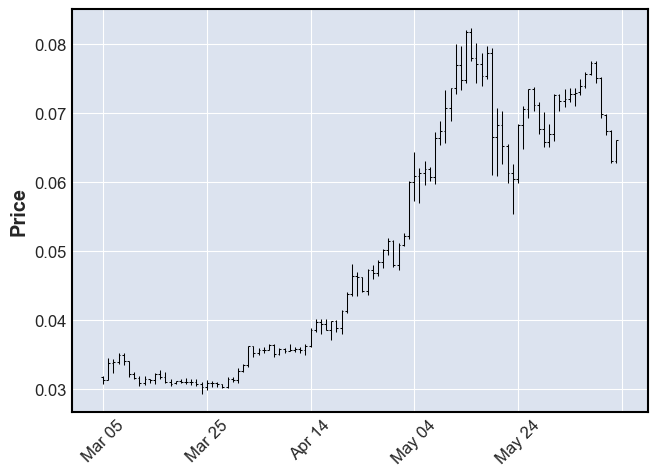

In [150]:
mplf.plot(hist_df2)

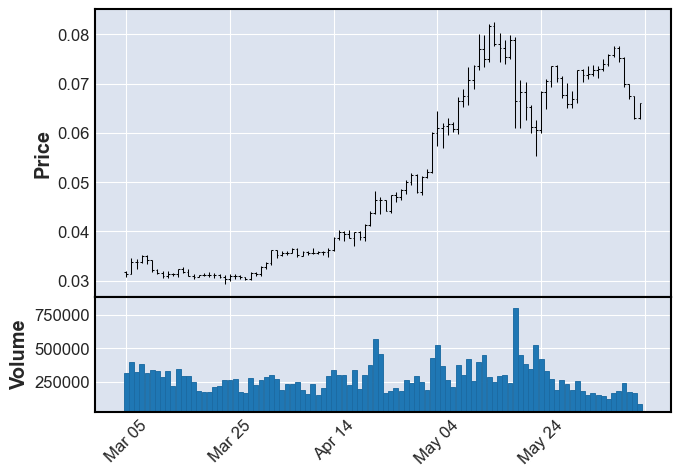

In [178]:
#Plot volume using 'volume' parameter
mplf.plot(historical_df.set_index('Close Time').tail(100), volume = True) 

Plot types can be specified with the keyword argument type, for example, type='candle', type='line', type='renko', or type='pnf'

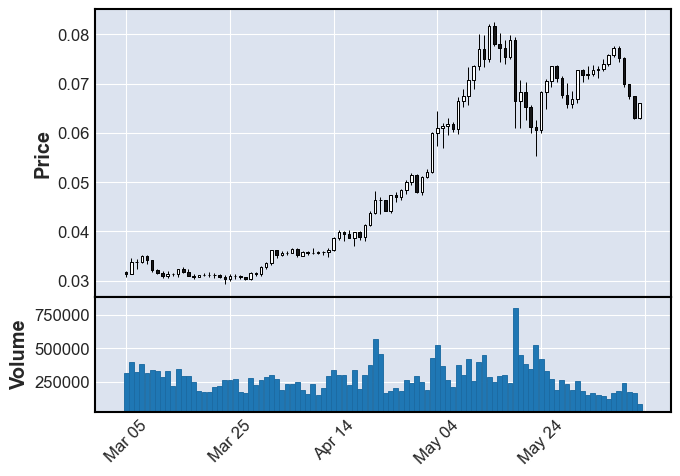

In [154]:
#Different types of graphs
mplf.plot(historical_df.set_index('Close Time').tail(100), volume = True, type = 'candle') 

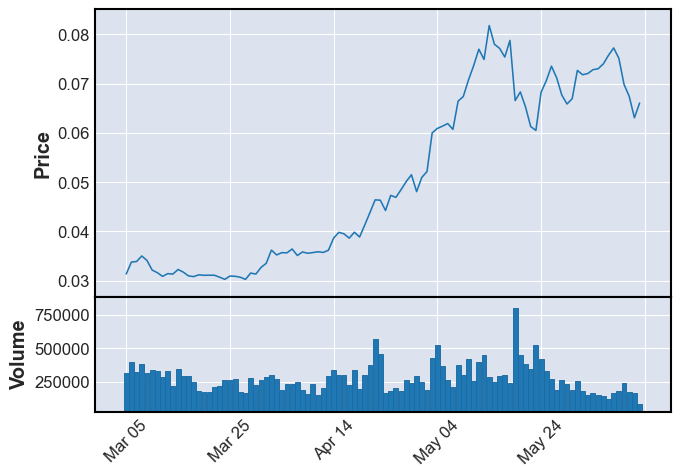

In [160]:
mplf.plot(historical_df.set_index('Close Time').tail(100), volume = True, type = 'line') 

By default, there will be no gaps on the x-axis even when there are non-trading days. To show the gaps on the x-axis on non trading days, using 'show_nontrading' parameter - as illustrated below. 
In the graph below, we see no gaps since ETHBTC was traded everyday

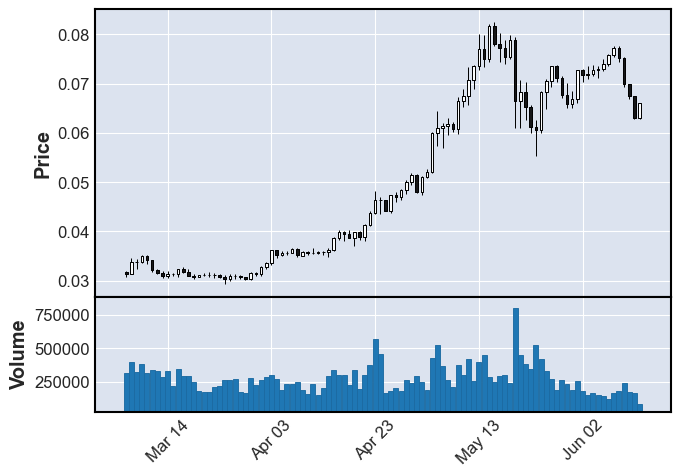

In [156]:
mplf.plot(historical_df.set_index('Close Time').tail(100), volume = True, type = 'candle', show_nontrading = True) 

Use different mplfinance styles to add more customization to your charts

In [180]:
#list of possible 'style' attributes
mplf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

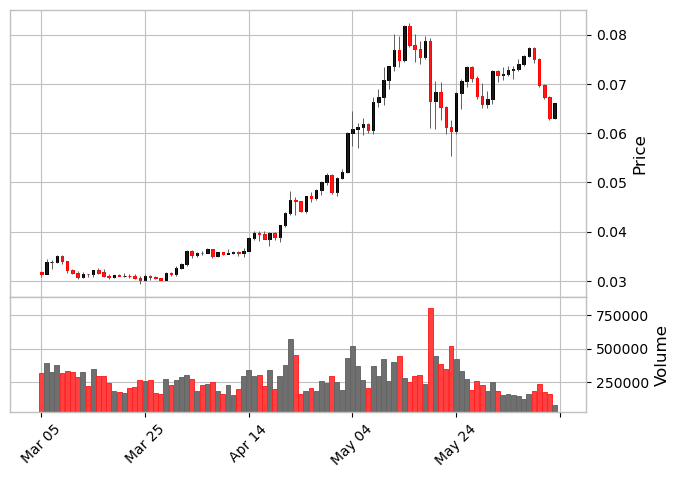

In [166]:
#Checkers style
mplf.plot(historical_df.set_index('Close Time').tail(100), volume = True, type = 'candle', style = 'checkers')

Plotting moving averages using 'mav' keyword 
- Static number for single MAV
- Tuple for multiple MAVS

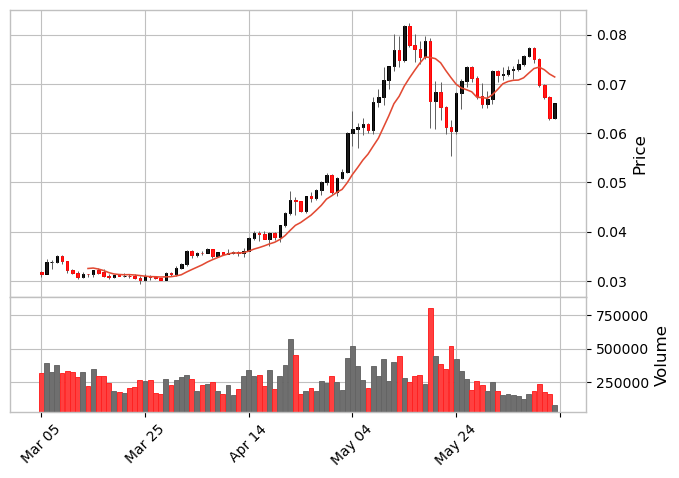

In [167]:
#Single MAV
mplf.plot(historical_df.set_index('Close Time').tail(100), volume = True, type = 'candle', style = 'checkers', mav = 10)

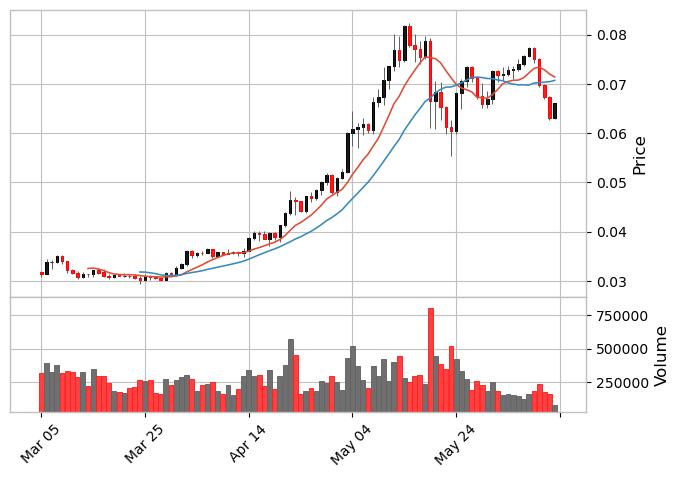

In [168]:
#Multiple moving averages
mplf.plot(historical_df.set_index('Close Time').tail(100), volume = True, type = 'candle', style = 'checkers', mav = (10,20)) 

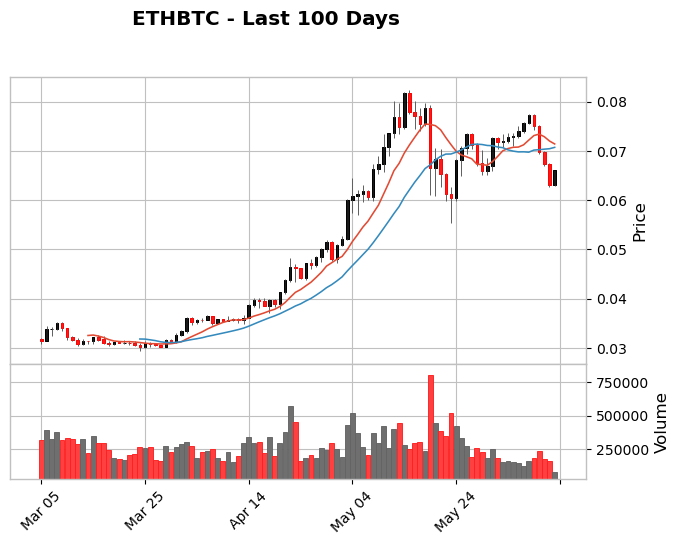

In [170]:
#Giving the graph a title 
mplf.plot(historical_df.set_index('Close Time').tail(100), 
          volume = True, 
          type = 'candle', 
          style = 'checkers', 
          mav = (10,20),
          title = 'ETHBTC - Last 100 Days') 